# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-polarizadores-lineales" data-toc-modified-id="Determinación-de-los-parámetros-de-los-polarizadores-lineales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los polarizadores lineales</a></div><div class="lev2 toc-item"><a href="#Cargar-la-intensidad-con-P1-y-P4" data-toc-modified-id="Cargar-la-intensidad-con-P1-y-P4-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cargar la intensidad con P1 y P4</a></div><div class="lev2 toc-item"><a href="#Fitting-data-to-sine" data-toc-modified-id="Fitting-data-to-sine-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fitting data to sine</a></div><div class="lev2 toc-item"><a href="#Calibration-parameters" data-toc-modified-id="Calibration-parameters-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Calibration parameters</a></div><div class="lev1 toc-item"><a href="#Otros-ajustes" data-toc-modified-id="Otros-ajustes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Otros ajustes</a></div><div class="lev2 toc-item"><a href="#Fitting-to-matrices---1:-sencillo" data-toc-modified-id="Fitting-to-matrices---1:-sencillo-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fitting to matrices - 1: sencillo</a></div><div class="lev2 toc-item"><a href="#Ajuste-global:-p0,-p1,-angulo" data-toc-modified-id="Ajuste-global:-p0,-p1,-angulo-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ajuste global: p0, p1, angulo</a></div><div class="lev3 toc-item"><a href="#Verificación" data-toc-modified-id="Verificación-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Verificación</a></div><div class="lev3 toc-item"><a href="#Comparación" data-toc-modified-id="Comparación-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Comparación</a></div><div class="lev3 toc-item"><a href="#Conclusión" data-toc-modified-id="Conclusión-223"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Conclusión</a></div>

# Medir la matriz de Mueller de un elemento

**Autor**: Jesús del Hoyo

**Fecha**:   03/09/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Polarizador 1 LPNIRE100-B (P1).
1. Polarizador 4 LPNIRE100-B (P2), solo en Experimento 2.

We assume that the polarizers may depolarize, with their Mueller matrix as:

\begin{equation}
M_{pol}(\theta=0)=M_{depol}*M_{diat}(\theta=0)=
\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & d & 0 & 0 \\
0 & 0 & d & 0 \\
0 & 0 & 0 & d \\
\end{array}\right] *
\left[\begin{array}{cccc}
P^2_1+P^2_2 & P^2_1-P^2 & 0 & 0 \\
P^2_1-P^2 & P^2_1+P^2_2 & 0 & 0 \\
0 & 0 & 2P_1P_2 & 0 \\
0 & 0 & 0 & 2P_1P_2 \\
\end{array}\right]
\end{equation}

**4th experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).
1. Divisor de haz Thorlabs CCM1-BS014/M (BS).
1. Polarizador 1 LPNIRE100-B (P2).

Variables: 
1. 2D, P1 and P2 rotation.
1. 2D, R1 and P2 rotation.

Parameters that can be extracted from fit:
1. Theta 0 of R1.
1. R parameters (moddeled as diattenuator retarder).

**5th experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).
1. Divisor de haz Thorlabs CCM1-BS014/M (BS).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R2).
1. Polarizador 1 LPNIRE100-B (P2).

Variables: 
1. 2D, R1 and R2 rotation, both polarizers horizontal.
1. 2D, R1 and R2 rotation, first polarizer horizontal, second polarizer vertical.

Parameters that can be extracted from fit:
1. Theta 0 of R2.
1. Fine tuning of R parameters (moddeled as diattenuator retarder).


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [15]:
from __future__ import print_function

import time
import pprint

from numpy import array, matrix, matmul, power, sum, size, zeros
from math import sin, cos, pi, sqrt, floor
from cmath import exp

from phyton_optics import degrees , sp, plt

from scipy import optimize, exp
from scipy.io import loadmat

from polarimeter.utils import plot_experiment_residuals_1D, clean_intensity, plot_2d
#from polarimeter.polarimeter import (get_polarimeter_parameters, intensity, 
#                                    polarimeter_matrices, get_light_parameters)

from phyton_optics.polarization_jones import rotation
from phyton_optics.polarization_stokes import polarizer_linear, rotate_mueller, polarized_light


import polarimeter.polarimeter as opsys
import phyton_optics.polarization_jones as pj
import phyton_optics.polarization_stokes as ps
import phyton_optics.polarization_mueller_analysis as amm
import numpy as np
import scipy as sp
import os

## Load data

In [5]:
# Go to the desired folder
#dir = 'calibration'
print(os.getcwd())
#os.chdir(dir)

intensity_0 = np.array([-0.0243, 0.0217])
# Load file, Illumination maximum
filename = 'Intensidad_max_2018-10-01.npz'
data = np.load(filename)
# Rename variables
Iindividual = data['Iindividual']
Naverage = data['Naverage']
# Load file, Experiment 3a
intensity_0 = np.array([-0.0295, 0.0217])
filename = 'Experimento_5a_2018-10-01.npz'
data = np.load(filename)
# Rename variables
angle_e3ax = data['angle2x']*degrees
angle_e3ay = data['angle2y']*degrees
I_e3a_double = data['intensity2'] - intensity_0
# Load file, Experiment 3b
filename = 'Experimento_5b_2018-10-01.npz'
data = np.load(filename)
# Rename variables
angle_e3bx = data['angle2x']*degrees
angle_e3by = data['angle2y']*degrees
I_e3b_double = data['intensity2'] - intensity_0

# Make stadistics
mean = np.mean(Iindividual, axis=0)
I_e3a = clean_intensity(I_e3a_double, mean[1], Nd=2)
I_e3b = clean_intensity(I_e3b_double, mean[1], Nd=2)

D:\codigo\polarimeter\notebooks\calibration


## Check: calculated data

The end goal of the polarimeter is measure the Mueller matrix of an element inseted between R1 and R2. We can use air as test, but let's start with calculated data to check that all works.

Perfect. Let's move to the real elements we measured.

In [10]:
# Already characterized elements
(p11,p12, delay1) = (0.962421338047, 0.0723017114037, 109.674226344*degrees)
(p21, p22) = (0.974429083571, 0.0933985896782)
(th0p1, th0p2) = (122.449494104*degrees, 104.736748578*degrees)
th0p1ad = 4.49058478366*degrees
parR1 = [1.00633931598, 1.01339903131, 84.6008729373*degrees]
th0r1 = 175.571888512*degrees
th0r1ad = 9.1554487636*degrees
parR2 = [0.932112996884, 0.936748373013, 81.6800679199*degrees]
th0r2 = 2.78054116251*degrees
Jp1 = ps.Mueller_Real_Retarder(p11, p12, delay1)
Jp2 = ps.polarizer_linear(p21, p22)
Jr1 = ps.Mueller_Real_Retarder(parR1[0], parR1[1], parR1[2])
Jr2 = ps.Mueller_Real_Retarder(parR2[0], parR2[1], parR2[2])
M = [Jp1, Jr1, Jr2, Jp2]
th0 = [th0p1+th0p1ad, th0r1+th0r1ad, th0r2, th0p2]
Ifuente = np.matrix(np.array([[5.86922518], [0.56906085], [-0.25053408], [5.83619796]]))

# Angles
n = 15*14
movePol = False
if movePol:
    a1 = np.random.rand(n)*pi
    a4 = np.random.rand(n)*pi
else:
    a1 = np.zeros(n)
    a4 = np.zeros(n)
a2 = np.random.rand(n)*pi
a3 = np.random.rand(n)*pi
th1 = [a1, a2, a3, a4]
# Calulate intensity of the simulated experiment
Iteor = np.zeros(n)
for ind in range(0,n):
    th2 = [a1[ind], a2[ind], a3[ind], a4[ind]]
    Iteor[ind] = opsys.Intensity_Rotating_Elements(M, th2, Ifuente)

# Do the polarimeter experiment and calculate error
Mair = opsys.polarimeter_experiment(M, Ifuente, Iteor, th1)
target = np.identity(4)
error = Mair - target
error = np.std(error)

# Print result and compare with the theoretical one
print('Target')
print(target)
print('Calculated')
print(Mair)
print('Eror: {}'.format(error))

Target
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Calculated
[[ 1. -0. -0.  0.]
 [-0.  1.  0. -0.]
 [-0. -0.  1.  0.]
 [-0.  0. -0.  1.]]
Eror: 1.70156260462e-14


Now with the theoretical data of the 3rd experiment

In [11]:
# Already characterized elements
(p11,p12, delay1) = (0.962421338047, 0.0723017114037, 109.674226344*degrees)
(p21, p22) = (0.974429083571, 0.0933985896782)
(th0p1, th0p2) = (122.449494104*degrees, 104.736748578*degrees)
th0p1ad = 4.49058478366*degrees
parR1 = [1.00633931598, 1.01339903131, 84.6008729373*degrees]
th0r1 = 175.571888512*degrees
th0r1ad = 9.1554487636*degrees
parR2 = [0.932112996884, 0.936748373013, 81.6800679199*degrees]
th0r2 = 2.78054116251*degrees
Jp1 = ps.Mueller_Real_Retarder(p11, p12, delay1)
Jp2 = ps.polarizer_linear(p21, p22)
Jr1 = ps.Mueller_Real_Retarder(parR1[0], parR1[1], parR1[2])
Jr2 = ps.Mueller_Real_Retarder(parR2[0], parR2[1], parR2[2])
M = [Jp1, Jr1, Jr2, Jp2]
th0 = [th0p1+th0p1ad, th0r1+th0r1ad, th0r2, th0p2]
Ifuente = np.matrix(np.array([[5.86922518], [0.56906085], [-0.25053408], [5.83619796]]))

# Angles
angulox = angle_e3bx
anguloy = angle_e3by
AnguloY, AnguloX = np.meshgrid(anguloy, angulox)
#print([AnguloX.shape, Iexperim.shape])
a2 = AnguloX.flatten() - th0[1]
a3 = AnguloY.flatten() - th0[2]
a1 = sp.zeros_like(a2) - th0[0]
a4 = sp.zeros_like(a2) - th0[3]
th1 = [a1, a2, a3, a4]
# Calulate intensity of the simulated experiment
Iteor = np.zeros(n)
for ind in range(0,n):
    th2 = [a1[ind], a2[ind], a3[ind], a4[ind]]
    Iteor[ind] = opsys.Intensity_Rotating_Elements(M, th2, Ifuente)

# Do the polarimeter experiment and calculate error
Mair = opsys.polarimeter_experiment(M, Ifuente, Iteor, th1)
target = np.identity(4)
error = Mair - target
error = np.std(error)

# Print result and compare with the theoretical one
print('Target')
print(target)
print('Calculated')
print(Mair)
print('Eror: {}'.format(error))

Target
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Calculated
[[ 1.  0. -0.  0.]
 [ 0.  1. -0.  0.]
 [-0. -0.  1. -0.]
 [-0. -0.  0.  1.]]
Eror: 1.136597528e-14


And finally with the experimental data.

In [21]:
# Already characterized elements
(p11,p12, delay1) = (0.962421338047, 0.0723017114037, 109.674226344*degrees)
(p21, p22) = (0.974429083571, 0.0933985896782)
(th0p1, th0p2) = (122.449494104*degrees, 104.736748578*degrees)
th0p1ad = 4.49058478366*degrees
parR1 = [1.00633931598, 1.01339903131, 84.6008729373*degrees]
th0r1 = 175.571888512*degrees
th0r1ad = 9.1554487636*degrees
parR2 = [0.932112996884, 0.936748373013, 81.6800679199*degrees]
th0r2 = 2.78054116251*degrees
Jp1 = ps.Mueller_Real_Retarder(p11, p12, delay1)
Jp2 = ps.polarizer_linear(p21, p22)
Jr1 = ps.Mueller_Real_Retarder(parR1[0], parR1[1], parR1[2])
Jr2 = ps.Mueller_Real_Retarder(parR2[0], parR2[1], parR2[2])
M = [Jp1, Jr1, Jr2, Jp2]
th0 = [th0p1+th0p1ad, th0r1+th0r1ad, th0r2, th0p2]
Ifuente = np.matrix(np.array([[5.86922518], [0.56906085], [-0.25053408], [5.83619796]]))

# Angles
angulox = angle_e3bx
anguloy = angle_e3by
AnguloY, AnguloX = np.meshgrid(anguloy, angulox)
#print([AnguloX.shape, Iexperim.shape])
a2 = AnguloX.flatten() - th0[1]
a3 = AnguloY.flatten() - th0[2]
a1 = sp.zeros_like(a2) - th0[0]
a4 = sp.zeros_like(a2) - th0[3] + pi/2
th1 = [a1, a2, a3, a4]
# Calulate intensity of the simulated experiment
Iteor = np.zeros(n)
for ind in range(0,n):
    th2 = [a1[ind], a2[ind], a3[ind], a4[ind]]
    Iteor[ind] = opsys.Intensity_Rotating_Elements(M, th2, Ifuente)
Iexperim = I_e3b
Iteor2 = np.reshape(Iteor,Iexperim.shape)
plt.figure(figsize=(20, 5))       
plt.subplot(1,3,1)
plot_2d(AnguloX, AnguloY, Iexperim, title='Exerimental')    
plt.subplot(1,3,2)
plot_2d(AnguloX, AnguloY, Iteor2, title='Fit')    


# Do the polarimeter experiment and calculate error
Mair = opsys.polarimeter_experiment(M, Ifuente, Iexperim.flatten(), th1)
target = np.identity(4)
error = Mair - target
error = np.std(error)

# Print result and compare with the theoretical one
print('Target')
print(target)
print('Calculated')
print(Mair)
print('Eror: {}'.format(error))

Target
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Calculated
[[ 1.12732056 -0.02703092  0.00446339 -0.00181399]
 [ 0.01435147  1.11734273 -0.0246266  -0.00940104]
 [ 0.02749697  0.03270754  1.11061627  0.00256843]
 [-0.00837527 -0.00630023  0.00121874  1.10535556]]
Eror: 0.0520504704337


42.5


Again, the result is perfect, because we are using perfectly calculated data. 

## Theory with errors

Now, I will introduce errors in the calculated intensity. Using a double loop, I can plot ho does change the total error in the matrix determination.

[(15L,), (11L,), (15L, 11L)]


Text(0.5,1,'Error with A = 0.06')

<Figure size 432x288 with 0 Axes>

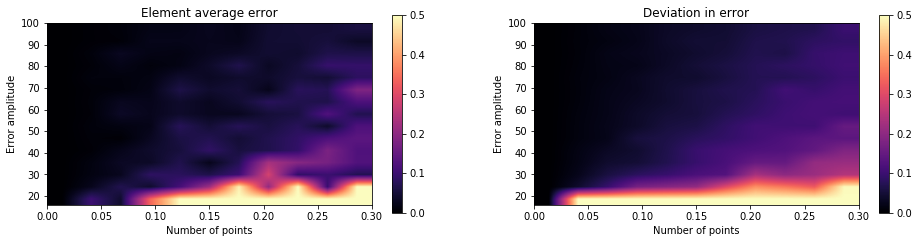

<Figure size 432x288 with 0 Axes>

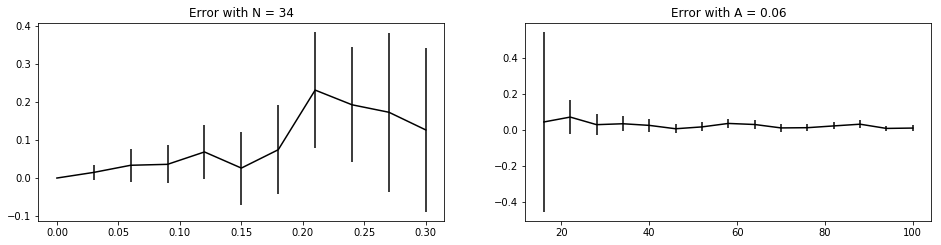

In [187]:
# Mueller matrices
d = 0.9990659
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = depolarizer_diattenuator(p11, p12, d)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 39.931683767*degrees, 176.510741175*degrees, 16.287001807*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = ps.circular_light()*Imax
parR1 = [1.0097711371, 1.01715770267, 84.1791246323*degrees]
parR2 = [0.992382266627, 0.989041217204, 82.6198373758*degrees]
Jr1 = Mueller_Retarder(parR1[0], parR1[1], parR1[2])
Jr2 = Mueller_Retarder(parR2[0], parR2[1], parR2[2])
M = [Jp1, Jr1, Jr2, Jp2]

# Data to model errors and number of measurements
target = np.identity(4)
(n0, n1, nn) = (16, 100, 15)
(a0, a1, an) = (0, 0.3, 11)
threshold = 0.5
thresholdDev = 0.5
narray = np.linspace(n0, n1, nn, dtype = 'int')
aarray = np.linspace(a0, a1, an)
error = np.zeros((nn, an))
dev = np.zeros((nn, an))
Naverage = 10

# Loops introducing error
    # Initialize matrix
for indN, n in enumerate(narray):
    for indA, a in enumerate(aarray): 
        mean = matrix(np.zeros((4,4)))         
        desv = np.zeros(Naverage)
        delta = np.zeros(Naverage)
        for indM in range(Naverage):
            # Angles
            movePol = False
            if movePol:
                a1 = np.random.rand(n)*pi
                a4 = np.random.rand(n)*pi
            else:
                a1 = np.zeros(n)
                a4 = np.zeros(n)
            a2 = np.random.rand(n)*pi
            a3 = np.random.rand(n)*pi
            th1 = [a1, a2, a3, a4]
            # Calulate intensity of the simulated experiment
            Iteor = range(n)
            for ind in range(0,n):
                th2 = [a1[ind], a2[ind], a3[ind], a4[ind]]
                Iteor[ind] = ((np.random.rand(1)-0.5)*a + 1) * Intensity_Rotating_Elements(M, th2, E0)

            # Do the polarimeter experiment, and calculate stadistics
            Mbs = opsys.polarimeter_experiment(M, E0, Iteor, th1)
            mean = mean + Mbs/Naverage
            desv[indM] = np.std((Mbs-target))
            delta =  np.mean(abs(Mbs-target))
        # Calculate error
        err = mean - target
        error[indN, indA] = min([np.mean(delta), threshold])
        dev[indN, indA] = min([np.mean(desv), thresholdDev])
        #print(["Number of points: {}; Error amplitude: {}; Average error{};".format(n, a, error[indN, indA])])

# Plot 2D
plt.figure()
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
print([narray.shape, aarray.shape, error.shape])
extension = sp.array([aarray[0], aarray[-1], narray[0], narray[-1]])
IDimage = plt.imshow(
        error,
        interpolation='bilinear',
        aspect=2e-3,
        origin='lower',
        extent=extension)
plt.xlabel("Number of points")
plt.ylabel("Error amplitude")
plt.title("Element average error")
plt.colorbar()
IDimage.set_cmap("magma")

plt.subplot(2,2,2)
IDimage = plt.imshow(
        dev,
        interpolation='bilinear',
        aspect=2e-3,
        origin='lower',
        extent=extension)
plt.xlabel("Number of points")
plt.ylabel("Error amplitude")
plt.title("Deviation in error")
plt.colorbar()
IDimage.set_cmap("magma")

# Plot 1D
plt.figure()
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
nshow = 3
plt.errorbar(aarray, error[nshow,:], yerr=dev[nshow,:], fmt='k')
plt.title('Error with N = {}'.format(narray[nshow]) )

#plt.figure()
plt.subplot(2,2,2)
nshow2 = 2
plt.errorbar(narray, error[:,nshow2], yerr=dev[:,nshow2], fmt='k')
plt.title('Error with A = {}'.format(aarray[nshow2]) )

Average value saturates around 0.025, with a similar saturated std.

Repeat the result with moving polarizers.

[(15L,), (11L,), (15L, 11L)]


Text(0.5,1,'Error with A = 0.06')

<Figure size 432x288 with 0 Axes>

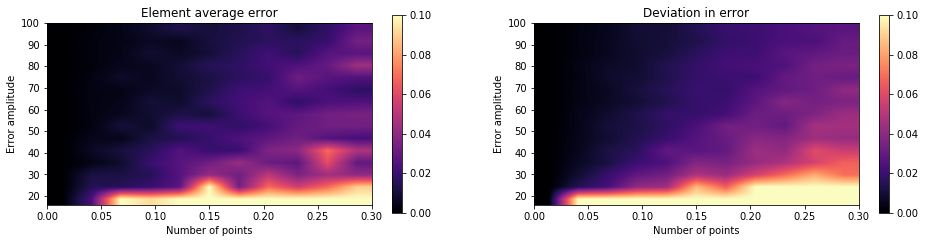

<Figure size 432x288 with 0 Axes>

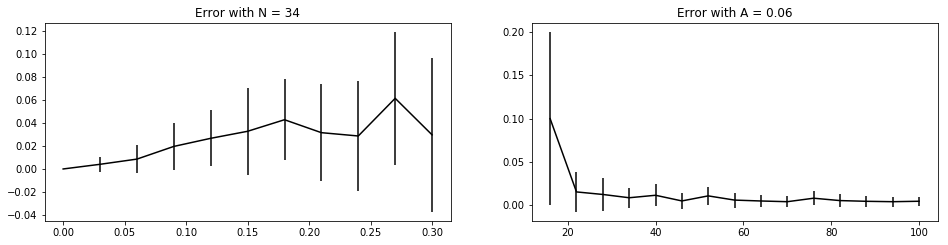

In [172]:
# Mueller matrices
d = 0.9990659
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = depolarizer_diattenuator(p11, p12, d)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 39.931683767*degrees, 176.510741175*degrees, 16.287001807*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = ps.circular_light()*Imax
parR1 = [1.0097711371, 1.01715770267, 84.1791246323*degrees]
parR2 = [0.992382266627, 0.989041217204, 82.6198373758*degrees]
Jr1 = Mueller_Retarder(parR1[0], parR1[1], parR1[2])
Jr2 = Mueller_Retarder(parR2[0], parR2[1], parR2[2])
M = [Jp1, Jr1, Jr2, Jp2]

# Data to model errors and number of measurements
target = np.identity(4)
(n0, n1, nn) = (16, 100, 15)
(a0, a1, an) = (0, 0.3, 11)
threshold = 0.1
thresholdDev = 0.1
narray = np.linspace(n0, n1, nn, dtype = 'int')
aarray = np.linspace(a0, a1, an)
error = np.zeros((nn, an))
dev = np.zeros((nn, an))
Naverage = 10

# Loops introducing error
    # Initialize matrix
for indN, n in enumerate(narray):
    for indA, a in enumerate(aarray): 
        mean = matrix(np.zeros((4,4)))         
        desv = np.zeros(Naverage)
        delta = np.zeros(Naverage)
        for indM in range(Naverage):
            # Angles
            movePol = True
            if movePol:
                a1 = np.random.rand(n)*pi
                a4 = np.random.rand(n)*pi
            else:
                a1 = np.zeros(n)
                a4 = np.zeros(n)
            a2 = np.random.rand(n)*pi
            a3 = np.random.rand(n)*pi
            th1 = [a1, a2, a3, a4]
            # Calulate intensity of the simulated experiment
            Iteor = range(n)
            for ind in range(0,n):
                th2 = [a1[ind], a2[ind], a3[ind], a4[ind]]
                Iteor[ind] = ((np.random.rand(1)-0.5)*a + 1) * Intensity_Rotating_Elements(M, th2, E0)

            # Do the polarimeter experiment, and calculate stadistics
            Mbs = opsys.polarimeter_experiment(M, E0, Iteor, th1)
            mean = mean + Mbs/Naverage
            desv[indM] = np.std((Mbs-target))
            delta =  np.mean(abs(Mbs-target))
        # Calculate error
        err = mean - target
        error[indN, indA] = min([np.mean(delta), threshold])
        dev[indN, indA] = min([np.mean(desv), thresholdDev])
        #print(["Number of points: {}; Error amplitude: {}; Average error{};".format(n, a, error[indN, indA])])

# Plot 2D
plt.figure()
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
print([narray.shape, aarray.shape, error.shape])
extension = sp.array([aarray[0], aarray[-1], narray[0], narray[-1]])
IDimage = plt.imshow(
        error,
        interpolation='bilinear',
        aspect=2e-3,
        origin='lower',
        extent=extension)
plt.xlabel("Number of points")
plt.ylabel("Error amplitude")
plt.title("Element average error")
plt.colorbar()
IDimage.set_cmap("magma")

plt.subplot(2,2,2)
IDimage = plt.imshow(
        dev,
        interpolation='bilinear',
        aspect=2e-3,
        origin='lower',
        extent=extension)
plt.xlabel("Number of points")
plt.ylabel("Error amplitude")
plt.title("Deviation in error")
plt.colorbar()
IDimage.set_cmap("magma")

# Plot 1D
plt.figure()
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
nshow = 3
plt.errorbar(aarray, error[nshow,:], yerr=dev[nshow,:], fmt='k')
plt.title('Error with N = {}'.format(narray[nshow]) )

#plt.figure()
plt.subplot(2,2,2)
nshow2 = 2
plt.errorbar(narray, error[:,nshow2], yerr=dev[:,nshow2], fmt='k')
plt.title('Error with A = {}'.format(aarray[nshow2]) )

Seems much better than with still polarizers, although that will have other problems. With errors ~6%, the average error seem to saturate around 0.01, while the std seems to still decrease slowly. 

## Use experimental data

We have experimental data with the beam splitter between R1 and R2. We calibrated it before calibrating R1 and R2, so we have reference values to check. The two polarizers are still, so the errors will be larger.

In [15]:
# Mueller matrices
d = 0.9990659
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = depolarizer_diattenuator(p11, p12, d)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 39.931683767*degrees, 176.510741175*degrees, 16.287001807*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = ps.circular_light()*Imax
parR1 = [1.0097711371, 1.01715770267, 84.1791246323*degrees]
parR2 = [0.992382266627, 0.989041217204, 82.6198373758*degrees]
Jr1 = Mueller_Retarder(parR1[0], parR1[1], parR1[2])
Jr2 = Mueller_Retarder(parR2[0], parR2[1], parR2[2])
M = [Jp1, Jr1, Jr2, Jp2]

# Experimental angles and data
target = ps.rotate_mueller(Jbs, -th0[2])
a3, a2 = np.meshgrid(angle_e5ay - th0[3], angle_e5ax - th0[1])
#print([a2.shape, I_e5a.shape])
#print([a2.size, a3.size])
a1 = np.zeros(a2.size) - th0[0]
a4 = np.zeros(a2.size) - th0[4]
Iexp = I_e5a.flatten()
a2 = a2.flatten()
a3 = a3.flatten()
th1 = [a1, a2, a3, a4]

# Do the polarimeter experiment and calculate error
Mbs = opsys.polarimeter_experiment(M, E0, Iexp, th1)
error = Mbs - target
error = np.mean(abs(error))
#cH, fH = ps.is_homogeneous(Mbs)
#fis = ps.check_mueller(Mbs)
#cF = all([fis['cond1'][1], fis['cond2'][1], fis['cond3'][1], fis['cond5'][1]])
#fF = [fis['cond1'][0], fis['cond2'][0], fis['cond3'][0], fis['cond5'][0]]

# Print result and compare with the theoretical one
print('Target')
print(target)
print('Calculated')
print(Mbs)
print('Eror: {}'.format(error))
#print('The calculated matrix is homogeneous: {}, with a degree of homogeneity {}.'.format(cH, fH))
#print('The calculated matrix is physically acceptable: {}, with condition factors {}'.format(cF, fF))

# Try to extract meaning from the matrix
amm.all_parameters(Mbs)
_, _, _ = amm.decompose_polar(Mbs, decomposition='DRP', verbose=True, co=False)
amm.all_parameters(target)
#_, _, _ = amm.decompose_polar(Mbs, decomposition='DRP', verbose=True, co=False)


Target
[[ 0.86763179 -0.01063813 -0.00130215  0.        ]
 [-0.01063813  0.86763081  0.00000798  0.        ]
 [-0.00130215  0.00000798  0.86756657  0.        ]
 [ 0.          0.          0.          0.86756559]]
Calculated
[[ 0.88103314 -0.01450151 -0.00111806  0.00850633]
 [-0.00873963  0.82502323  0.00144498  0.01065284]
 [-0.00403708  0.00575499  0.80844181  0.06694443]
 [ 0.00450825 -0.01503793 -0.08510081  0.82824145]]
Eror: 0.0225670828423
 
Parameters of the matrix:
  The matrix is physically consistent.
  The matrix is depolarizing:
    - The degree of polarimetric purity is: 0.93429923744
  The matrix is not singular.
    - The determinant of the matrix is = 0.490834685862
    - The minimum eigenvalue of the matrix is = 0.821440438474
  The mean intensity coefficient (m00) is: 0.881033143662
  The diattenuation is: 0.0191245661524
    - The linear diattenuation is: 0.016508512846
    - The circular diattenuation is: 0.00965494868612
  The polarizance is: 0.012065730114
    - T

Seems to be a good result if we only look at the matrix, as the first decimal is accurate. But when we look at the parameters of the decomposed matrix, we see a degree of depolarization of 0.064!!! 

Try again with the newest parameters for the setup elements.

In [8]:
# Mueller matrices
(p11, p12, p21, p22, R) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047, 84.0376822489*degrees)
Jp1 = Mueller_Retarder(p11, p12, R)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 39.931683767*degrees, 176.510741175*degrees, 16.287001807*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees, 0.2102]
E0 = ps.Jones_to_Stokes(pj.elliptical_light(parE[0], parE[1], parE[2], parE[3]), [1, parE[4]])
#E0 = ps.circular_light()*Imax
parR1 = [1.01180294033, 1.01989892928, 84.0376822489*degrees]
parR2 = [0.993559284697, 0.990213072332, 82.783898962*degrees]
Jr1 = Mueller_Retarder(parR1[0], parR1[1], parR1[2])
Jr2 = Mueller_Retarder(parR2[0], parR2[1], parR2[2])
M = [Jp1, Jr1, Jr2, Jp2]

# Experimental angles and data
target = ps.rotate_mueller(Jbs, -th0[2])
a3, a2 = np.meshgrid(angle_e5ay - th0[3], angle_e5ax - th0[1])
#print([a2.shape, I_e5a.shape])
#print([a2.size, a3.size])
a1 = np.zeros(a2.size) - th0[0]
a4 = np.zeros(a2.size) - th0[4]
Iexp = I_e5a.flatten()
a2 = a2.flatten()
a3 = a3.flatten()
th1 = [a1, a2, a3, a4]

# Do the polarimeter experiment and calculate error
Mbs = opsys.polarimeter_experiment(M, E0, Iexp, th1)
error = Mbs - target
error = np.mean(abs(error))
#cH, fH = ps.is_homogeneous(Mbs)
#fis = ps.check_mueller(Mbs)
#cF = all([fis['cond1'][1], fis['cond2'][1], fis['cond3'][1], fis['cond5'][1]])
#fF = [fis['cond1'][0], fis['cond2'][0], fis['cond3'][0], fis['cond5'][0]]

# Print result and compare with the theoretical one
print('Target')
print(target)
print('Calculated')
print(Mbs)
print('Eror: {}'.format(error))
#print('The calculated matrix is homogeneous: {}, with a degree of homogeneity {}.'.format(cH, fH))
#print('The calculated matrix is physically acceptable: {}, with condition factors {}'.format(cF, fF))

# Try to extract meaning from the matrix
amm.all_parameters(Mbs)
_, _, _ = amm.decompose_polar(Mbs, decomposition='DRP', verbose=True, co=False)
amm.all_parameters(target)

Target
[[ 0.86763179 -0.01063813 -0.00130215  0.        ]
 [-0.01063813  0.86763081  0.00000798  0.        ]
 [-0.00130215  0.00000798  0.86756657  0.        ]
 [ 0.          0.          0.          0.86756559]]
Calculated
[[ 0.87288678 -0.01496089  0.00208679  0.00906241]
 [ 0.04509934  0.85016582 -0.05319544  0.00813105]
 [ 0.0152893   0.05802721  0.8307731   0.07084158]
 [ 0.00517831 -0.02347471 -0.10233754  0.8529841 ]]
Eror: 0.0302739869119
 
Parameters of the matrix:
  The matrix is not physically consistent:
    - Sixth condition violated (distance = -0.013301146638)
  The matrix is depolarizing:
    - The degree of polarimetric purity is: 0.973321586725
  The matrix is not singular.
    - The determinant of the matrix is = 0.534153363973
    - The minimum eigenvalue of the matrix is = 0.845953012431
  The mean intensity coefficient (m00) is: 0.872886780895
  The diattenuation is: 0.0201808747938
    - The linear diattenuation is: 0.0173054767112
    - The circular diattenuation

Now, try to fit the identity matrix. For that purpose, we will use the beam splitter as a pure diattenuator.

In [11]:
# Mueller matrices
(p11, p12, p21, p22, R) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047, 84.0376822489*degrees)
Jp1 = Mueller_Retarder(p11, p12, R)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 39.931683767*degrees, 176.510741175*degrees, 16.287001807*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees, 0.2102]
E0 = ps.Jones_to_Stokes(pj.elliptical_light(parE[0], parE[1], parE[2], parE[3]), [1, parE[4]])
#E0 = ps.circular_light()*Imax
parR1 = [1.01180294033, 1.01989892928, 84.0376822489*degrees]
parR2 = [0.993559284697, 0.990213072332, 82.783898962*degrees]
Jr1 = Mueller_Retarder(parR1[0], parR1[1], parR1[2])
Jr2 = Mueller_Retarder(parR2[0], parR2[1], parR2[2])
M = [Jp1, Jr1, Jr2, Jp2]

# Experimental angles and data
Mbs = ps.rotate_mueller(Jbs, -th0[2])
a3, a2 = np.meshgrid(angle_e5ay - th0[3], angle_e5ax - th0[1])
#print([a2.shape, I_e5a.shape])
#print([a2.size, a3.size])
a1 = np.zeros(a2.size) - th0[0]
a4 = np.zeros(a2.size) - th0[4]
Iexp = I_e5a.flatten()
a2 = a2.flatten()
a3 = a3.flatten()
th1 = [a1, a2, a3, a4]

# Do the polarimeter experiment and calculate error
Msample = opsys.polarimeter_experiment(M, E0, Iexp, th1, Mbefore=Mbs)
target = np.eye(4)
error = Msample - target
error = np.mean(abs(error))
#cH, fH = ps.is_homogeneous(Mbs)
#fis = ps.check_mueller(Mbs)
#cF = all([fis['cond1'][1], fis['cond2'][1], fis['cond3'][1], fis['cond5'][1]])
#fF = [fis['cond1'][0], fis['cond2'][0], fis['cond3'][0], fis['cond5'][0]]

# Print result and compare with the theoretical one
print('Target')
print(target)
print('Calculated')
print(Msample/Msample[0,0])
print('Eror: {}'.format(error))
#print('The calculated matrix is homogeneous: {}, with a degree of homogeneity {}.'.format(cH, fH))
#print('The calculated matrix is physically acceptable: {}, with condition factors {}'.format(cF, fF))

# Try to extract meaning from the matrix
amm.all_parameters(Msample)
_, _, _ = amm.decompose_polar(Mbs, decomposition='DRP', verbose=True, co=False)
#amm.all_parameters(target)

Target
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Calculated
[[ 1.         -0.01713955  0.00239068  0.01038211]
 [ 0.05166688  0.97397032 -0.06094197  0.00931512]
 [ 0.01751579  0.06647736  0.95175356  0.08115781]
 [ 0.0059324  -0.02689319 -0.11724034  0.97719902]]
Eror: 0.0625546719403
 
Parameters of the matrix:
  The matrix is not physically consistent:
    - Sixth condition violated (distance = -0.013301146638)
  The matrix is depolarizing:
    - The degree of polarimetric purity is: 0.973321586725
    - The ddepolarization degree is: 0.229445176056
  The matrix is not singular.
    - The determinant of the matrix is = 0.534153363973
    - The minimum eigenvalue of the matrix is = 0.845953012431
  The mean intensity coefficient (m00) is: 0.872886780895
  The diattenuation is: 0.0201808747938
    - The linear diattenuation is: 0.0173054767112
    - The circular diattenuation is: 0.0103821088051
  The polarizance is: 0.0548767953576
    - The linear polarizance is: 

In [218]:
A = matrix(array([[0, 1], [0, 0]]))
val, mat = np.linalg.eig(A)
print(np.linalg.det(mat))

2.004168360008884e-292


1

## Unused functions

Stored here as backup

In [ ]:
def iscolumn(v):
    """Checks if the array v is a column array or not.
    Args:
        v (array): Array to be tested.
    Output:
        cond (bool): True if v is a column array."""
    cond = False
    s = v.shape
    if len(s) == 2:
        if s[0] == 1 and s[1] > 1:
            cond = True
    return cond

In [185]:
# Experimental angles and data
target = ps.rotate_mueller(Jbs, -th0[2])
a3, a2 = np.meshgrid(angle_e5ay - th0[3], angle_e5ax - th0[1])
#print([a2.shape, I_e5a.shape])
#print([a2.size, a3.size])
a1 = np.zeros(a2.size) - th0[0]
a4 = np.zeros(a2.size) - th0[4]
Iexp = I_e5a.flatten()
a2 = a2.flatten()
a3 = a3.flatten()

# Take random values
Nrv = 35
Nv = a2.size
b1 = np.zeros(Nrv)
b2 = np.zeros(Nrv)
b3 = np.zeros(Nrv)
b4 = np.zeros(Nrv)
Ired = np.zeros(Nrv)
available = range(Nv)
used = np.zeros(Nrv)
# Loop for choosing points randomly
for ind in range(Nrv):
    # We can't take the same value twice to be able to calculate inverse matrices    
    rindt = int(floor(np.random.rand(1) * len(available)))
    rind = available[rindt]
    available.remove(rind)
    used[ind] = rind
    # Take the values
    b1[ind] = a1[rind]
    b2[ind] = a1[rind]
    b3[ind] = a1[rind]
    b4[ind] = a1[rind]
    Ired[ind] = Iexp[rind]
th1 = [b1, b2, b3, b4]
print([len(set(used)), Nrv])

# Do the polarimeter experiment and calculate error
Mbs = opsys.polarimeter_experiment(M, E0, Ired, th1)
error = Mbs - target
error = np.mean(abs(error))

# Print result and compare with the theoretical one
print('Target')
print(target)
print('Calculated')
print(Mbs)
print('Eror: {}'.format(error))

[35, 35]


LinAlgError: singular matrix